# Signal decomposition by machine learning

## configuration

In [1]:
import numpy as np
# https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html
from matplotlib import pyplot as plt

# https://docs.scipy.org/doc/scipy/reference/generated/scipy.misc.electrocardiogram.html
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.datasets.electrocardiogram.html
from scipy.misc import electrocardiogram # deprecated since version 1.10.0 - use scipy.datasets.electrocardiogram

# https://neuropsychology.github.io/NeuroKit/
import neurokit2 as nk

import sklearn
# https://scikit-learn.org/stable/modules/classes.html#module-sklearn.ensemble
from sklearn.ensemble import RandomForestRegressor
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html
from sklearn.model_selection import RandomizedSearchCV

## data preparation to simulate signal composition

In [2]:
x = np.linspace(-np.pi, np.pi*100, 100000)
ecg1 = np.sin(x)
ecg2 = np.tan(x) / 10
composition = ecg1 + ecg2

In [3]:
# ecg1 = electrocardiogram()
# length = len(ecg1)
# mu, sigma = 0, 0.01
# noise = np.random.normal(mu, sigma, [1, length])
# ecg2 = ecg1 + noise[0]
# # https://numpy.org/doc/stable/reference/random/generated/numpy.random.randint.html
# positions = np.random.randint(800, 9000, 100)
# # https://numpy.org/doc/stable/reference/generated/numpy.nditer.html
# positions_it = np.nditer(positions, flags=['f_index'])
# insertions = np.random.randint(500, 1000, 100)
# index = 0
# while index < length:
#     for position in positions_it:
#         if index + insertions[positions_it.index] < length:
#             insertion = noise[0][index:index+insertions[positions_it.index]] + ecg1[index]
#             # https://numpy.org/doc/stable/reference/generated/numpy.insert.html
#             ecg1 = np.insert(ecg1, index, insertion)
#             index = index + position
# ecg1 = ecg1[0:length]
# composition = ecg1 + ecg2
# # x = np.arange(0, len(composition))

In [4]:
# ecg1 = nk.ecg_simulate(duration=10, heart_rate=80, heart_rate_std=20)
# ecg2 = nk.ecg_simulate(duration=10, heart_rate=50, heart_rate_std=5)
# composition = ecg1 + ecg2
# # x = np.arange(0, len(composition))

100000

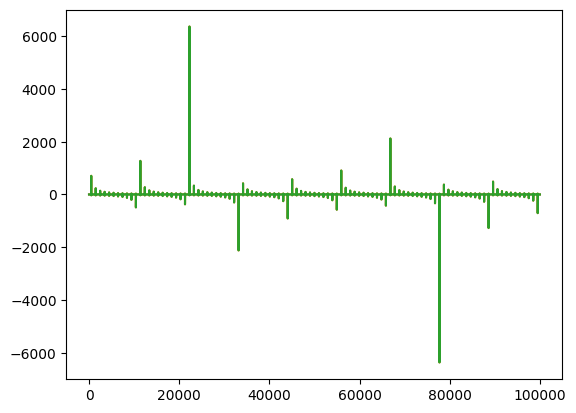

In [5]:
plt.plot(ecg1)
plt.plot(ecg2)
plt.plot(composition)
len(composition)

In [6]:
length = len(ecg1)
position = int(length * 0.8)
ecg1_train = ecg1[0:position]
ecg1_test = ecg1[position:length]
ecg2_train = ecg2[0:position]
ecg2_test = ecg2[position:length]
# https://numpy.org/doc/stable/reference/generated/numpy.transpose.html
X_train = np.transpose(([composition[0:position]]))
X_test = np.transpose(([composition[position:length]]))
y_train = np.transpose((ecg1_train, ecg2_train))
y_test = np.transpose((ecg1_test, ecg2_test))
y_test[0:2]

array([[-0.58572973, -0.07226713],
       [-0.58315501, -0.07178521]])

In [7]:
X_train[0:2]

array([[-1.10218212e-16],
       [-2.85572989e-03]])

## model training

In [8]:
# https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html
model = RandomForestRegressor()
model.fit(X_train, y_train)
predictions = model.predict(X_test)
errors = abs(predictions - y_test)
mape = 100 * np.mean(errors / y_test)
print('MAE:', sklearn.metrics.mean_absolute_error(y_test, predictions))
print('MAPE sklearn:', sklearn.metrics.mean_absolute_percentage_error(y_test, predictions))
print('MAPE:', mape)

MAE: 0.20121055359748313
MAPE sklearn: 17456057743.34588
MAPE: 1950036907571.2449


In [9]:
model.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

## hyperparameter tuning

In [10]:
# # https://towardsdatascience.com/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74
# # Number of trees in random forest
# n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# # Number of features to consider at every split
# max_features = ['log2', 'sqrt']
# # Maximum number of levels in tree
# max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
# max_depth.append(None)
# # Minimum number of samples required to split a node
# min_samples_split = [2, 5, 10]
# # Minimum number of samples required at each leaf node
# min_samples_leaf = [1, 2, 4]
# # Method of selecting samples for training each tree
# bootstrap = [True, False]# Create the random grid
# random_grid = {'n_estimators': n_estimators,
#                'max_features': max_features,
#                'max_depth': max_depth,
#                'min_samples_split': min_samples_split,
#                'min_samples_leaf': min_samples_leaf,
#                #'bootstrap': bootstrap
#                }

# # Use the random grid to search for best hyperparameters
# # First create the base model to tune
# rf = RandomForestRegressor()
# # Random search of parameters, using 3 fold cross validation, 
# # search across 100 different combinations, and use all available cores
# rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, n_jobs = -1) # random_state=42, 
# # Fit the random search model
# rf_random.fit(X_train, y_train)

# rf_random.best_params_

In [11]:
# def evaluate(model, test_features, test_labels):
#     predictions = model.predict(test_features)
#     errors = abs(predictions - test_labels)
#     mape = 100 * np.mean(errors / test_labels)
#     accuracy = 100 - mape
#     print('Model Performance')
#     print('MAPE sklearn:', sklearn.metrics.mean_absolute_error(test_labels, predictions))
#     print('MAPE:', mape)
#     print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
#     print('Accuracy = {:0.2f}%.'.format(accuracy))
    
#     return accuracy

# base_model = RandomForestRegressor(n_estimators = 10, random_state = 42)
# base_model.fit(X_train, y_train)
# base_accuracy = evaluate(base_model, X_test, y_test)

# best_random = rf_random.best_estimator_
# random_accuracy = evaluate(best_random, X_test, y_test)

# print('Improvement of {:0.2f}%.'.format( 100 * (random_accuracy - base_accuracy) / base_accuracy))

## signal decomposition

In [12]:
decomposition = model.predict(X_test)
decomposition[0:2]

array([[-0.81558791,  0.15759603],
       [-0.89178505,  0.23684368]])

In [13]:
ecg1_test[0:4]

array([-0.58572973, -0.58315501, -0.58057443, -0.577988  ])

In [14]:
y_test[0:4][0:4]

array([[-0.58572973, -0.07226713],
       [-0.58315501, -0.07178521],
       [-0.58057443, -0.07130549],
       [-0.577988  , -0.07082793]])

In [15]:
decomposition[0:4][0:4]

array([[-0.81558791,  0.15759603],
       [-0.89178505,  0.23684368],
       [-0.76215822,  0.11028093],
       [-0.90723644,  0.25842019]])

In [16]:
y_test[:, 0][0:4]

array([-0.58572973, -0.58315501, -0.58057443, -0.577988  ])

0 0 185.4785


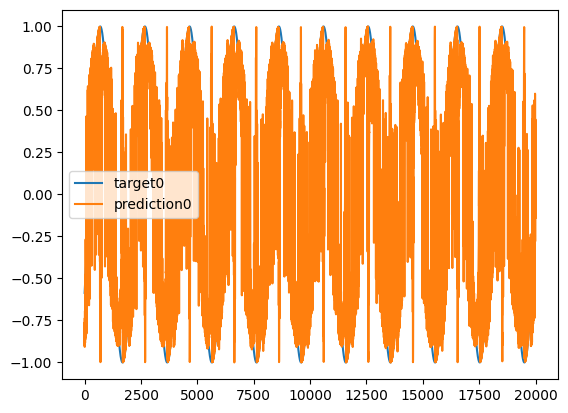

0 1 988.2268


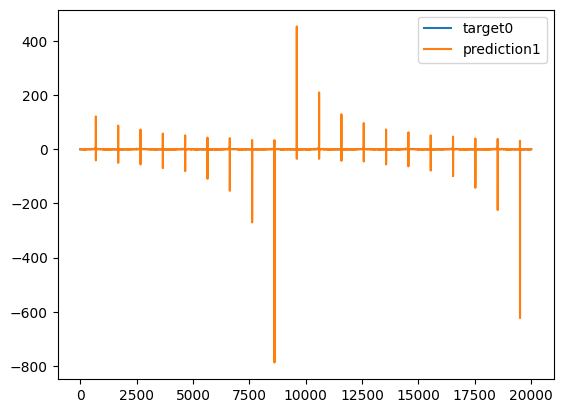

1 0 1019.61475


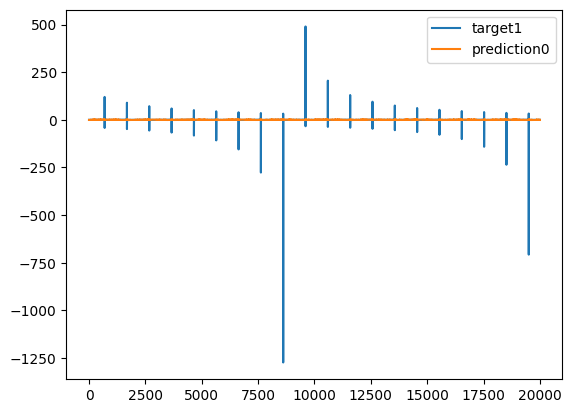

1 1 216.55915


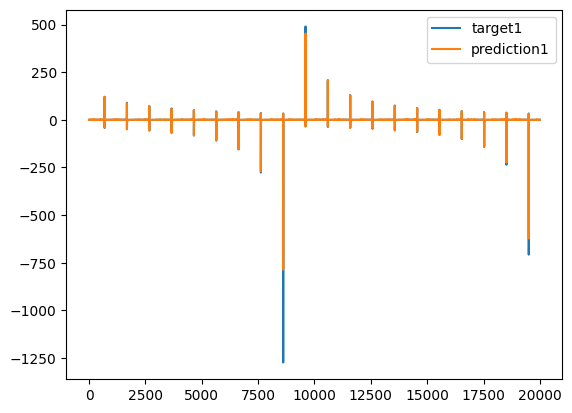

In [24]:
for i in [0,1]:
    for j in [0,1]:
        print(i, j, sklearn.metrics.mean_absolute_error((y_test[:, i]*1000).astype(int), (decomposition[:, j]*1000).astype(int)))
        plt.plot(y_test[:, i], label='target' + str(i))
        # plt.legend()
        # plt.show()
        plt.plot(decomposition[:, j], label='prediction' + str(j))
        plt.legend()
        plt.show()

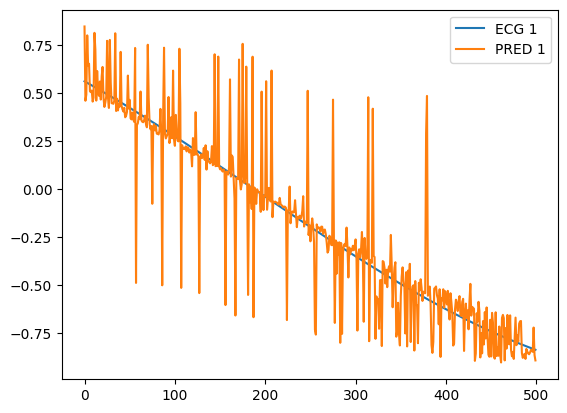

In [27]:
plt.plot(y_test[:, 0][1000:1500], label='ECG 1')
plt.plot(decomposition[:, 0][1000:1500], label='PRED 1')
plt.legend()

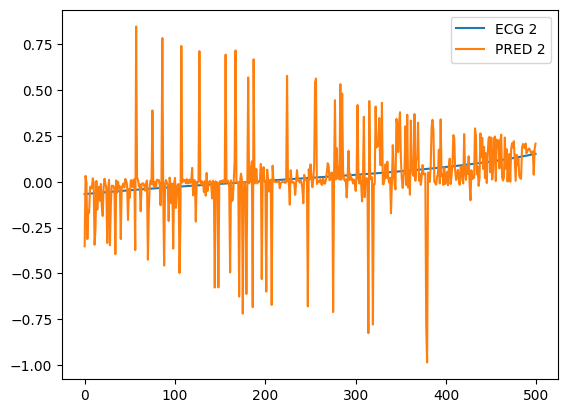

In [28]:
plt.plot(y_test[:, 1][1000:1500], label='ECG 2')
plt.plot(decomposition[:, 1][1000:1500], label='PRED 2')
plt.legend()

In [25]:
np.save('decomposition.by.ml.1.npy', decomposition)
np.save('y_test.by.ml.1.npy', y_test)